# Exercise 9 -Path Planning

## 9.1 Greedy Uninformed Search [3.0]

In this exercise, you will implement a greedy uninformed search algorithm to find the shortest path from a start to a goal location.

The input to the search is:
- the map of the environment $\mathbf{M}$
- the start position $\mathbf{x}_{start}$
- the goal position $\mathbf{x}_{goal}$

The output is the sequence of positions $(x,y)$ from the start to the goal.

At each step, the robot is allowed to move from one cell to one of the 8 neighboring cells.

This search algorithm is similar to A* but does not use any heuristic to guide the search.
Therefore, the cost of each step of the search is defined only by $g(\mathbf{x})$, which is the 'actual' cost from $\mathbf{x}_{start}$ to $\mathbf{x}$. 

Implement the `plan_path_uninformed` function and verify that it is correct for some test input.

Use the available function `is_valid` to select only the cells that belong to the free space.

In [1]:
%matplotlib inline
import ex9 as ex
import matplotlib.image as mpimg
import numpy as np

## 9.2 Greedy Uninformed Planning [2.0]

Use `plan_path_uninformed` to plan a path from start to goal in the following scenario.

Plot the resulting path with the available function `plot_path`.

Print the lenght of the path and the number of nodes explored to find the goal.


goal reached


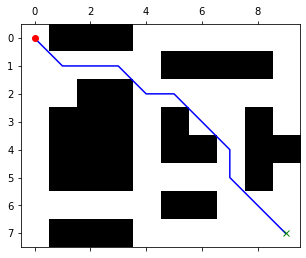

paths : 
 [(0, 0), (1, 1), (1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (4, 7), (5, 7), (6, 8), (7, 9)]


In [2]:
grid = np.array([
    [1,0,0,0,1,1,1,1,1,1],
    [1,1,1,1,1,0,0,0,0,1],
    [1,0,0,0,1,1,1,1,1,1],
    [1,0,0,0,1,0,1,1,0,1],
    [1,0,0,0,1,0,0,1,0,0],
    [1,0,0,0,1,1,1,1,0,1],
    [1,1,1,1,1,0,0,1,1,1],
    [1,0,0,0,1,1,1,1,1,1]])
grid[2,1] = 1
x_start =np.array([0,0])
x_goal = np.array([grid.shape[0]-1,grid.shape[1]-1])

paths = ex.plan_path_uninformed(x_start,x_goal,grid)
ex.plot_path(np.array(paths), x_start, x_goal,grid)
print("paths : \n",paths)


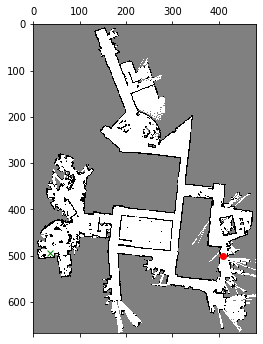

In [3]:
M = mpimg.imread('Map.png')

x_start = np.array([500, 410])
x_goal = np.array([495, 35])

ex.plot_path(np.array([]), x_start, x_goal, M)

In [5]:
path = ex.plan_path_uninformed(x_start,x_goal,M)

goal reached


459


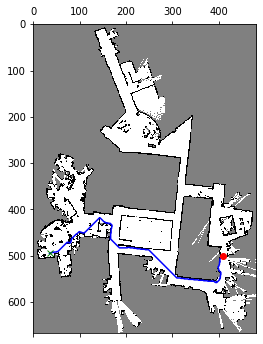

In [6]:
print(len(path))
# print(path)
ex.plot_path(np.array(path), x_start, x_goal, M)

## 9.3 A* algorithm [3.0]

Implement A* algorithm by adding an heuristic to the `plan_path_uninformed` algorithm to inform and speed up the search.

Use the (straight-line) Euclidean distance to the goal as a heuristic function.

Implement `plan_path_astar` and verify that it is correct for some test input.

goal reached


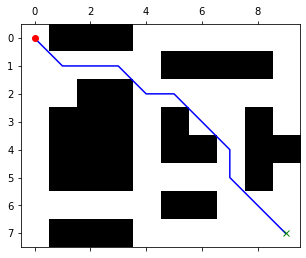

In [7]:
grid = np.array([
    [1,0,0,0,1,1,1,1,1,1],
    [1,1,1,1,1,0,0,0,0,1],
    [1,0,0,0,1,1,1,1,1,1],
    [1,0,0,0,1,0,1,1,0,1],
    [1,0,0,0,1,0,0,1,0,0],
    [1,0,0,0,1,1,1,1,0,1],
    [1,1,1,1,1,0,0,1,1,1],
    [1,0,0,0,1,1,1,1,1,1]])
grid[2,1] = 1
x_start =np.array([0,0])
x_goal = np.array([grid.shape[0]-1,grid.shape[1]-1])

path_test = ex.plan_path_astar(x_start,x_goal,grid)
ex.plot_path(np.array(path_test), x_start, x_goal,grid)
# print("paths : \n",paths)

## 9.4 A* planning [2.0]

Use `plan_path_astar` to plan a path from start to goal in the previous scenario.

Plot the resulting path with the available function `plot_path`.

Print the lenght of the path and the number of nodes explored to find the goal.

goal reached


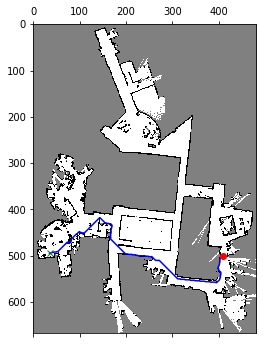

In [8]:
M = mpimg.imread('Map.png')
x_start = np.array([500, 410])
x_goal = np.array([495, 35])
path_astar = ex.plan_path_astar(x_start,x_goal,M)
ex.plot_path(np.array(path_astar), x_start, x_goal, M)

# Testing the path planner after applying gaussian blurring over the grid map

Please note that this is not a part of the excercise and just my experiments

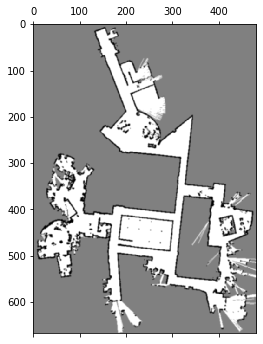

In [9]:
import cv2
import matplotlib.pyplot as plt
M = mpimg.imread('Map.png')
blurred = cv2.GaussianBlur(M,(5,5),0)
plt.matshow(blurred,cmap="gray")

goal reached


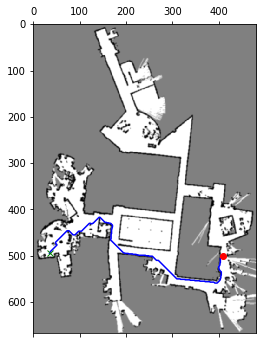

In [10]:
path_astar = ex.plan_path_astar(x_start,x_goal,blurred)
ex.plot_path(np.array(path_astar), x_start, x_goal, blurred)

In [11]:
print(len(path_astar))

469


# Final observations

Both greedy search and A start have faster execution times than uninformed algorithms. When compared to greedy A star returns a more optimal path.

Total node expanded in greedy search = 459
Total node expanded in greedy search = 469

Applying the A star algorithm on a gaussian blurred map gave significantly faster execution time